<a href="https://colab.research.google.com/github/JonathanMartignon/DeepLearningIntroduction/blob/main/Tarea1/Tarea1_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extiende el ejercicio 1c reglin.ipynb visto en clase para realizar regresión lineal con los dos atributos de entrada

Ejercicio Por: 
- Martiñón Luna Jonathan José

Nota: Recordamos que es una extensión del ejercicio visto en clase.

## 1 Preparación

### 1.1 Bibliotecas

In [54]:
# sistema de archivos
import os
# gráficas
import matplotlib.pyplot as plt
from matplotlib import cm
# csv
import pandas as pd
# redes neuronales
import torch
# Para Producto matricial
import numpy as np

### 1.2 Auxiliares

In [55]:
URL = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
base_dir = '../datos'
filename = 'califs.csv'
filepath = os.path.join(base_dir, filename)

## 2 Datos

Descargamos los datos.

In [56]:
! mkdir {base_dir}
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘../datos’: File exists
File ‘../datos/califs.csv’ already there; not retrieving.


Utilizamos para la lectura del csv e imprimimos los primeros 5 ejemplos.

In [57]:
df = pd.read_csv(filepath)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


Obtengamos el atributo y la salida:

In [58]:
# Dado que en este caso buscamos 2 entradas, seleccionaremos
# Los 2 primeros del dataframe (Pues el último es nuestro target)
x = torch.tensor(df.iloc[:, :2].values)

# La vista también se ve afectada, pues ya no es (-1,1)
# Ahora es (-1,2)
x = x.view(-1, 2).type(torch.float32)
print(x.shape)
x[:5]

torch.Size([50, 2])


tensor([[ 5.6000,  8.2000],
        [ 6.7000,  9.3000],
        [ 5.1000, 10.0000],
        [ 5.7000, 10.4000],
        [ 7.1000, 10.4000]])

In [59]:
#Nuestros valores de salida se mantienen iguales

y_true = torch.tensor(df.iloc[:, 2].values)
y_true = y_true.view(-1, 1).type(torch.float32)
print(y_true.shape)
y_true[:5]

torch.Size([50, 1])


tensor([[5.1000],
        [5.9000],
        [5.4000],
        [6.5000],
        [6.7000]])

In [60]:
# número de ejemplos y atributos
m, d = x.shape
m, d

(50, 2)

Grafiquemos para tener una idea de la distribución de los datos:

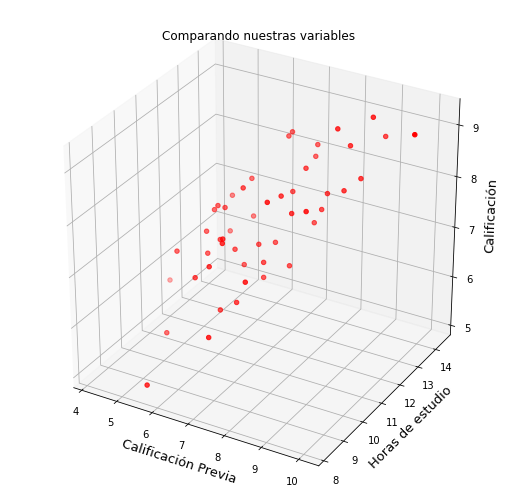

In [61]:
# Hemos tenido que modificar la función
# Para visualizar el comportamiento en 3D

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(111, projection='3d')

ax.set_title("Comparando nuestras variables")

ax.scatter(x[:,0].view(-1).numpy(),
            x[:,1].view(-1).numpy(), 
            y_true.view(-1).numpy(), c='r', marker='o')

ax.set_xlabel('Calificación Previa',fontsize=13)
ax.set_ylabel('Horas de estudio',fontsize=13)
ax.set_zlabel('Calificación',fontsize=13)

plt.show()

## 3 Hipótesis

Recordemos que dado un conjunto de ejemplos con atributos ($x_1, \dots, x_d$) y salidas $y$, la hipótesis de regresión lineal considerando un plano está dada por:

$$\hat{y} = w_1 x_1 + \dots + w_d x_d + b$$

Para este caso donde contamos con 2 variables de entrada, nuestra fórmula queda como:

$$\hat{y} = w_1 x_1 + w_2x_2 + b$$


## 4 Entrenamiento

Ahora implementemos todo en una función:

In [62]:
def train(x,y_true, w, b, alpha=0.01, steps=10):
    """Fits linear regression."""
    
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):
        # cómputo de la hipótesis
        y_pred = x@w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist

In [63]:
def calc_examples(x,y_true,alpha=0.01, steps=10):
    # ejemplos, atributos
    m, d = x.shape
    
    # Listas que almacenarán los pesos, betas e
    # Historial de pérdidas
    w = []
    b = []
    loss_hist=[]

    # Los pesos a evaluar
    random = torch.rand((d, 1))
    pesos = [torch.zeros(d, 1),
             torch.ones(d, 1),
             random,
             torch.tensor([[99999.]]*d)]
    # Las betas a evaluar
    bet = torch.rand(1)
    betas = [torch.zeros(1),
             torch.ones(1),
             bet,
             torch.tensor([[99999]])]

    for i in range(0,4):
      
      w_aux, b_aux, loss_hist_aux = train(x,y_true, pesos[i], betas[i], alpha=alpha, steps=steps)
      
      w.append(w_aux)
      b.append(b_aux)
      loss_hist.append(loss_hist_aux)

      num =random.numpy()
      num2=bet.numpy()
    return w, b, loss_hist, [num[0][0],num[1][0],num2[0]]

In [64]:
def plot_loss_hist(x,y_true,l,rand, steps):
  plt.figure(figsize=(14,8))
  

  ax1 = plt.subplot(221)
  ax1.set_title(f"Historial de pérdida con {steps[0]} pasos\n Para random tenemos: \n w=[{rand[0][0]},{rand[0][1]}] \n b=[{rand[0][2]}]")
  ax1.plot(range(len(l[0][0])), l[0][0], color='tab:red',label="w=[0,0], b=[0]")
  ax1.plot(range(len(l[0][1])), l[0][1], color='tab:green',label="w = [1,1], b=[1]")
  ax1.plot(range(len(l[0][2])), l[0][2], color='tab:blue',label=f"random(0,1)")
  # plt.plot(range(len(l10[3])), l10[3], color='tab:orange',label="99999")
  ax1.legend()

  ax2 = plt.subplot(222)
  ax2.set_title(f"Historial de pérdida con {steps[1]} pasos\n Para random tenemos: \n w=[{rand[1][0]},{rand[1][1]}] \n b=[{rand[1][2]}]")
  ax2.plot(range(len(l[1][0])), l[1][0], color='tab:red',label="w=[0,0], b=[0]")
  ax2.plot(range(len(l[1][1])), l[1][1], color='tab:green',label="w = [1,1], b=[1]")
  ax2.plot(range(len(l[1][2])), l[1][2], color='tab:blue',label=f"random(0,1)")
  # plt.plot(range(len(l50[3])), l50[3], color='tab:orange',label="99999")
  ax2.legend()

  ax3 = plt.subplot(212)
  ax3.set_title(f"Historial de pérdida con {steps[2]} pasos\n Para random tenemos: \n w=[{rand[2][0]},{rand[2][1]}] \n b=[{rand[2][2]}]")
  ax3.plot(range(len(l[2][0])), l[2][0], color='tab:red',label="w=[0,0], b=[0]")
  ax3.plot(range(len(l[2][1])), l[2][1], color='tab:green',label="w = [1,1], b=[1]")
  ax3.plot(range(len(l[2][2])), l[2][2], color='tab:blue',label=f"random(0,1)")
  # plt.plot(range(len(l30[3])), l30[3], color='tab:orange',label="99999")
  ax3.legend()

  plt.tight_layout()
  plt.show()

In [65]:
def Grafica_w_b(x,y_true,w,b,rando, pasos="x"):
  # EStos son los valores en rango de tu x
  u = torch.arange(4.,12.).reshape(-1, 1)
  # Estos son los valores continuos en rango de tu y
  v = torch.arange(7.,15.).reshape(-1, 1)
  # Los unimos en un nuevo conjunto continuo
  new_x = torch.cat((u, v), dim=1)

  fig = plt.figure(figsize=(9,9))
  fig.suptitle(f"Con {pasos} pasos\n")

  #-------------------------------
  # W[0,0] b[0]
  #------------------------------

  #Predecimos a apartir de las nuevas coordenadas
  y_aux = new_x @ w[0] + b[0]

  ax1 = fig.add_subplot(2, 2, 1, projection='3d')

  ax1.set_title("W[0,0] b[0]")

  # Ploteamos los datos iniciales
  ax1.scatter(x[:,0].view(-1).numpy(),
              x[:,1].view(-1).numpy(), 
              y_true.view(-1).numpy(), c='r', marker='o')

  #Generamos una malla con los valores nuevos de X y Y
  xx, yy= np.meshgrid(new_x[:,0].view(-1).numpy(), 
                        new_x[:,1].view(-1).numpy())
  # Generamos una malla para incluir a Z
  cc,zz = np.meshgrid(new_x[:,1].view(-1).numpy(),y_aux.view(-1).numpy())

  #Ploteamos el plano
  ax1.plot_surface(xx,yy,zz,cmap=cm.coolwarm,alpha = 0.4)

  #-------------------------------
  # W[1,1] b[1]
  #------------------------------

  ax2 = fig.add_subplot(2, 2, 2, projection='3d')

  #Predecimos a apartir de las nuevas coordenadas
  y_aux = new_x @ w[1] + b[1]

  ax2.set_title("W[1,1] b[1]")

  ax2.scatter(x[:,0].view(-1).numpy(),
              x[:,1].view(-1).numpy(), 
              y_true.view(-1).numpy(), c='r', marker='o')

  #Generamos una malla con los valores nuevos de X y Y
  xx, yy= np.meshgrid(new_x[:,0].view(-1).numpy(), 
                        new_x[:,1].view(-1).numpy())
  # Generamos una malla para incluir a Z
  cc,zz = np.meshgrid(new_x[:,1].view(-1).numpy(),y_aux.view(-1).numpy())

  #Ploteamos el plano
  ax2.plot_surface(xx,yy,zz,cmap=cm.gray,alpha = 0.4)

  #Seteamos ejes
  ax2.set_xlabel('Calificación Previa',fontsize=13)
  ax2.set_ylabel('Horas de estudio',fontsize=13)
  ax2.set_zlabel('Calificación',fontsize=13)

  #-------------------------------
  # W[random] b[random]
  #------------------------------

  ax3 = fig.add_subplot(2, 1, 2, projection='3d')

  #Predecimos a apartir de las nuevas coordenadas
  y_aux = new_x @ w[2] + b[2]

  ax3.set_title(f"w=[{rando[0]},{rando[1]}] \n b=[{rando[2]}]")

  ax3.scatter(x[:,0].view(-1).numpy(),
              x[:,1].view(-1).numpy(), 
              y_true.view(-1).numpy(), c='r', marker='o')

  #Generamos una malla con los valores nuevos de X y Y
  xx, yy= np.meshgrid(new_x[:,0].view(-1).numpy(), 
                        new_x[:,1].view(-1).numpy())
  # Generamos una malla para incluir a Z
  cc,zz = np.meshgrid(new_x[:,1].view(-1).numpy(),y_aux.view(-1).numpy())

  #Ploteamos el plano
  ax3.plot_surface(xx,yy,zz,cmap=cm.hsv,alpha = 0.4)

  #Seteamos ejes
  ax3.set_xlabel('Calificación Previa',fontsize=13)
  ax3.set_ylabel('Horas de estudio',fontsize=13)
  ax3.set_zlabel('Calificación',fontsize=13)

  plt.tight_layout()
  plt.show()

Grafiquemos la evolución de la pérdida para diversos pasos:

In [66]:
# Calculamos pesos para beta y w, así como nuestro
# Historial de pérdida y recolectamos
# Los números en w y b que se usaron inicialmente
# En el modo aleatorio

# Para 10 pasos
w10,b10,l10,rando10 = calc_examples(x,y_true,steps=10)

# Para 50 pasos
w20,b20,l20,rando20 = calc_examples(x,y_true,steps=20)

# Para 30 pasos
w30,b30,l30,rando30 = calc_examples(x,y_true,steps=30)

In [67]:
# Recolectamos cada dato en listas
w = [w10,w20,w30]
b = [b10,b20,b30]
l = [l10,l20,l30]
rand = [rando10,rando20,rando30]
# Almacenamos los pesos, también
steps = [10,20,30]

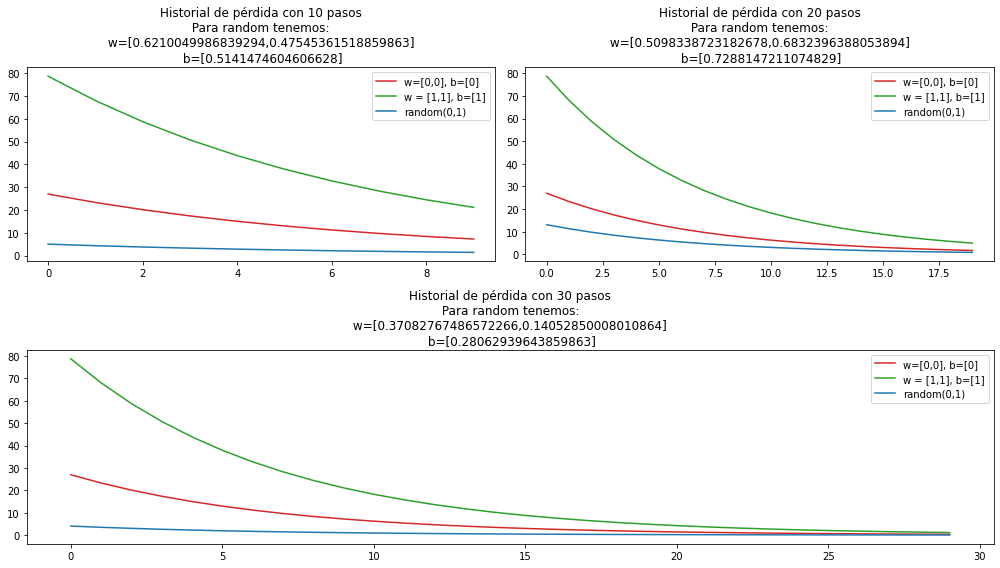

In [68]:
plot_loss_hist(x,y_true,l,rand,steps)

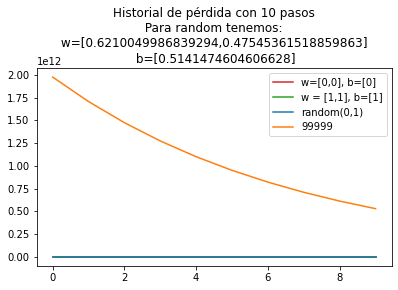

In [83]:
plt.figure(figsize=(14,8))

ax1 = plt.subplot(221)
ax1.set_title(f"Historial de pérdida con {steps[0]} pasos\n Para random tenemos: \n w=[{rand[0][0]},{rand[0][1]}] \n b=[{rand[0][2]}]")
ax1.plot(range(len(l[0][0])), l[0][0], color='tab:red',label="w=[0,0], b=[0]")
ax1.plot(range(len(l[0][1])), l[0][1], color='tab:green',label="w = [1,1], b=[1]")
ax1.plot(range(len(l[0][2])), l[0][2], color='tab:blue',label=f"random(0,1)")
plt.plot(range(len(l[0][3])), l[0][3], color='tab:orange',label="99999")
ax1.legend()

plt.show()

# Verificando nuestros modelos de regresión

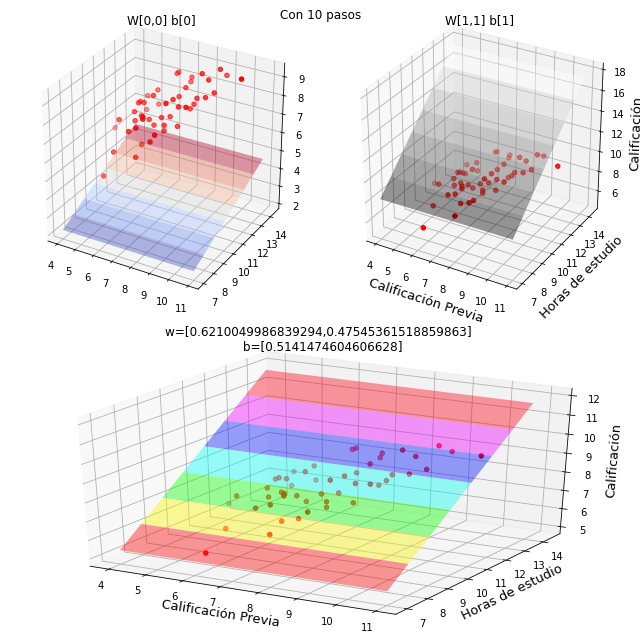

In [69]:
Grafica_w_b(x,y_true,w[0],b[0],rand[0], pasos="10")

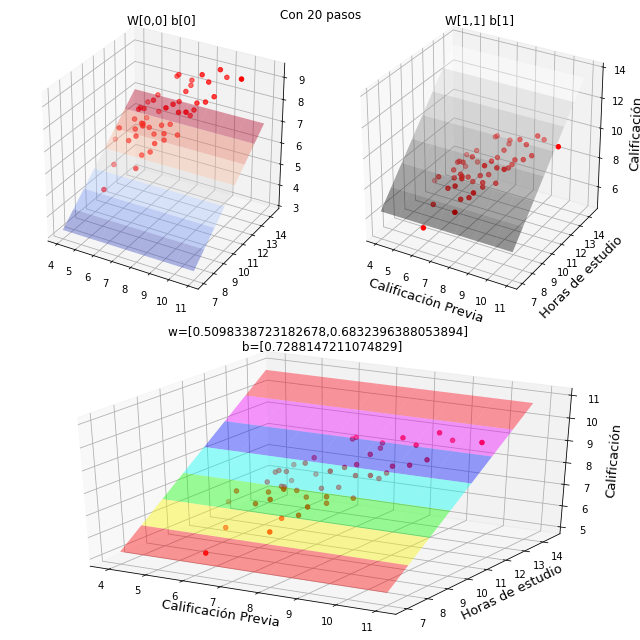

In [70]:
Grafica_w_b(x,y_true,w[1],b[1],rand[1], pasos="20")

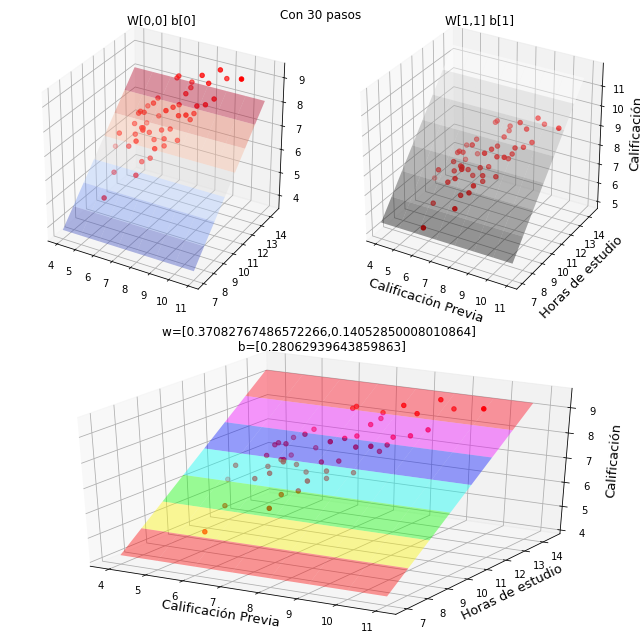

In [71]:
Grafica_w_b(x,y_true,w[2],b[2],rand[2], pasos="30")

# Conclusiones

1. Tal como se puede apreciar en los gráficos de pérdida, valores iniciales en 1 en $w$ o $\beta$ no resultan convenientes puesto que su historial de pérdida es bastante grande. Sin embargo, tal cual lo podemos ver en el último gráfico (También de la pérdida), al agregar un valor muuy grande, le resulta bastante complejo. Ni si quiera se alcanza a distinguir la diferencia entre los otros valores.

2. Valores en 0 no resultan tan graves, sin embargo, se puede optimizar al utilizar valores cercanos, pero no iguales.

3. Se compararon los modelos creados por cada uno de los diferentes valores iniciales y pesos curiosamente, en el primer caso (10 pasos) la inicialización en 0's aparenta ser mejor que la de 1's, esto puede ser debido a que la de 1's se encuentre encimada y por ende aparente un mayor ajuste. 

4. Atendiendo también a los modelos, podemos apreciar que para los números aleatorios no tarda mucho en ajustar.